Inspired by seaborn's open logo:
- https://github.com/mwaskom/seaborn/issues/2243
- https://gist.github.com/mwaskom/7eb7d01d9aa25ea83894293027d12a8c
- https://seaborn.pydata.org/citing.html

In [3]:
!pip install -r requirements.txt

In [127]:
from typing import Union, Tuple, List, Dict

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
from matplotlib.collections import PolyCollection
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.path import Path
from scipy.signal.windows import gaussian


In [161]:
Color = Union[str, Tuple[float, float, float]]
ColorsRow = Union[Color, List[Color]]
Colors = Tuple[ColorsRow, ColorsRow, ColorsRow, ColorsRow]


def logo(
        ax: plt.Axes,
        colors: Colors,
        pdf_means: List[int],
        pdf_sigma: float,
        dy: float,
        y0: float,
        w: float,
        h: float,
):
    # Square, invisible axes with specified limits to center the logo
    xlim=(40, 90)
    ylim=(0, 50)
    ax.set(xlim=xlim, ylim=ylim)
    ax.set_axis_off()
    ax.set_aspect('equal')

    # Full x and y grids for a gaussian curve
    x = np.arange(101)
    y = gaussian(x.size, pdf_sigma)

    x0 = 30  # Magic number
    xx = x[x0:]

    # Vertical distances between the PDF curves
    n = len(pdf_means)
    dys = np.linspace(0, (n - 1) * dy, n) - (n * dy / 2)
    dys -= dys.mean()

    # Compute the PDF curves with vertical offsets
    pdfs = [h * (y[x0 - m:-m] + y0 + dy) for m, dy in zip(pdf_means, dys)]

    # Add in constants to fill from bottom and to top
    pdfs.insert(0, np.full(xx.shape, -h))
    pdfs.append(np.full(xx.shape, 50 + h))

    for i, pdf in enumerate(pdfs[1:]):
        row_colors = colors[i]
        if not isinstance(row_colors, list):
            row_colors = [row_colors, row_colors]
        elif len(row_colors) == 0:
            raise ValueError("Empty row_colors")
        elif len(row_colors) == 1:
            row_colors = row_colors * 2

        poly: PolyCollection = ax.fill_between(
            xx,
            pdfs[i] + w,
            pdf,
            color='none',
            alpha=1,
            antialiased=True,
            lw=0,
        )
        poly_path: Path = poly.get_paths()[0]
        gradient = plt.imshow(
            np.linspace(0, 1, 256).reshape((1, -1)),
            cmap=LinearSegmentedColormap.from_list("Custom", row_colors),
            aspect='equal',
            extent=(*xlim, *ylim),
        )
        gradient.set_clip_path(poly_path, transform=ax.transData)

    plt.subplots_adjust(left=0., right=1, top=1, bottom=0.)



In [162]:
# COLORS: Dict[str, Colors] = {
#     # plotly logo blues
#     colors=[
#         ([0.22, 0.50, 0.96], ),
#         ([0.31, 0.62, 0.97], ),
#         ([0.40, 0.73, 0.99], ),
#         ([0.48, 0.85, 1.0], ),
#     ],
#     # plotly logo colors
#     colors=[
#         ([0.97, 0.24, 0.47], ),
#         ([0.85, 0.47, 0.64], ),
#         ([0.73, 0.65, 0.80], ),
#         ([0.54, 0.86, 0.97], ),
#     ],
#     # my blues
#     colors=[
#         ([0.48, 0.85, 1.0], ),
#         ([0.40, 0.73, 1.0], ),
#         ([0.31, 0.62, 1.0], ),
#         ([0.22, 0.50, 1.0], ),
#     ][::-1],
#     # colors=[
#     #     # ("#0072FF", "#00C6FF"),
#     #     # ("#0072FF", "#00C6FF"),
#     #     # ("#0072FF", "#00C6FF"),
#     #     # ("#0072FF", "#00C6FF"),
#     #     # ("#0072FF", "#00C6FF"),
#     #     #
#     #     # ("#9600FF", "#AEBAF8"),
#     #     # ("#9600FF", "#AEBAF8"),
#     #     # ("#9600FF", "#AEBAF8"),
#     #     # ("#9600FF", "#AEBAF8"),
#     #     # ("#9600FF", "#AEBAF8"),
#     #     #
#     #     # ("#04B0FD", "#00E1FA"),
#     #     # ("#04B0FD", "#00E1FA"),
#     #     # ("#04B0FD", "#00E1FA"),
#     #     # ("#04B0FD", "#00E1FA"),
#     #     # ("#04B0FD", "#00E1FA"),
#     #     #
#     #     # ("#FE5066", "#FFE136"),
#     #     # ("#FE5066", "#FFE136"),
#     #     # ("#FE5066", "#FFE136"),
#     #     # ("#FE5066", "#FFE136"),
#     #     # ("#FE5066", "#FFE136"),
#     #     # ("#FE5066", "#FFE136"),
#     #     #
#     #     # ("#8145FD", "#FF3AA1"),
#     #     # ("#8145FD", "#FF3AA1"),
#     #     # ("#8145FD", "#FF3AA1"),
#     #     # ("#8145FD", "#FF3AA1"),
#     #     # ("#8145FD", "#FF3AA1"),
#     #     #
#     #     ([0.2, 0.5, 1], [0.5, 0.9, 1]),
#     #     ([0.2, 0.5, 1], [0.5, 0.9, 1]),
#     #     ([0.2, 0.5, 1], [0.5, 0.9, 1]),
#     #     ([0.2, 0.5, 1], [0.5, 0.9, 1]),
#     #     ([0.2, 0.5, 1], [0.5, 0.9, 1]),
#     # ][::-1],
#     # pandas logo colors
#     colors=[
#         ([1.00, 0.79, 0.00], ),  # yellow
#         ([0.91, 0.01, 0.53], ),  # magenta
#         ([0.08, 0.03, 0.33], ),  # blue
#         ([1.00, 1.00, 1.00], ),  # white
#     ][::-1],
#     # plotly default colors
#     colors=[
#         ("#FFB782", "#FFA15A", "#FFA15A", "#FFA15A", "#FFBA88"),  # ORANGE: "#FFA15A", "#FFB782", "#FFBA88"
#         ("#C28CFC", "#AB63FA", "#AB63FA", "#AB63FA", "#C693FD"),  # PURPLE: "#AB63FA", "#C28CFC", "#C693FD"
#         ("#6ADAB2", "#00CC96", "#00CC96", "#00CC96", "#74DCB7"),  # GREEN:  "#00CC96", "#6ADAB2", "#74DCB7"
#         ("#F4806C", "#EF553B", "#EF553B", "#EF553B", "#F58674"),  # RED:    "#EF553B", "#F4806C", "#F58674"
#         ("#7D86FC", "#636EFA", "#636EFA", "#636EFA", "#818AFC"),  # BLUE:   "#636EFA", "#7D86FC", "#818AFC"
#     ][::-1],
# }

In [174]:
COLORS: Dict[str, Colors] = {
    "plotly-plotly": ("#636efa", "#EF553B", "#00cc96", "#ab63fa"),
    "plotly-plotly-grad": (
        ["#FFB782", "#FFA15A", "#FFA15A", "#FFA15A", "#FFBA88"],  # ORANGE: "#FFA15A", "#FFB782", "#FFBA88"
        ["#C28CFC", "#AB63FA", "#AB63FA", "#AB63FA", "#C693FD"],  # PURPLE: "#AB63FA", "#C28CFC", "#C693FD"
        ["#6ADAB2", "#00CC96", "#00CC96", "#00CC96", "#74DCB7"],  # GREEN:  "#00CC96", "#6ADAB2", "#74DCB7"
        ["#F4806C", "#EF553B", "#EF553B", "#EF553B", "#F58674"],  # RED:    "#EF553B", "#F4806C", "#F58674"
        ["#7D86FC", "#636EFA", "#636EFA", "#636EFA", "#818AFC"],  # BLUE:   "#636EFA", "#7D86FC", "#818AFC"
    )[::-1],
    "plotly-pastel": ("#66C5CC", "#F89C74", "#87C55F", "#DCB0F2", "#F6CF71")
}

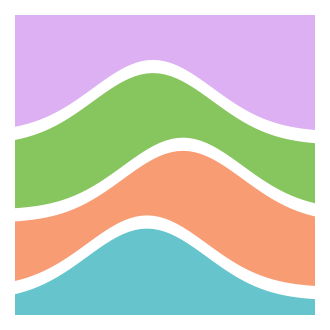

In [175]:
plt.rcParams["figure.dpi"] = 150

bg_color = [1, 1, 1, 0]
# bg_color = [1, 1, 1, 1]
# bg_color = "#34363C"


fig, ax = plt.subplots(figsize=(2, 2), facecolor=bg_color)

logo(
    ax,
    colors=COLORS["plotly-pastel"],
    pdf_means=[12, 18, 13],
    pdf_sigma=10,
    dy=1.08,
    y0=1.28,
    w=2.2,
    h=12,
)

fig.savefig("logo-badge.png", dpi=300)
plt.show()

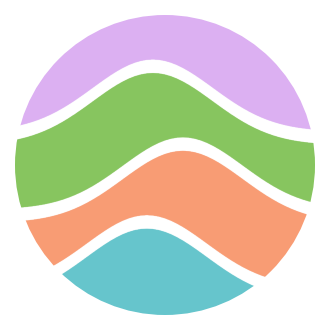

In [176]:
image = plt.imread('logo-badge.png')

fig, ax = plt.subplots(figsize=(2, 2), facecolor=bg_color)
im = ax.imshow(image)
im.set_clip_path(patches.Circle((300, 300), radius=300, transform=ax.transData))

ax.set(xlim=(0, 600), ylim=(0, 600))
ax.set_axis_off()
ax.set_aspect('equal')
ax.invert_yaxis()

plt.subplots_adjust(left=0., right=1, top=1, bottom=0.)
fig.savefig("result.png", facecolor=bg_color, dpi=300)

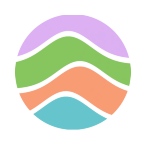

In [177]:
image = plt.imread('result.png')

fig, ax = plt.subplots(figsize=(1, 1), facecolor=[1, 1, 1, 1])
im = ax.imshow(image)

plt.axis('off')
# plt.subplots_adjust(left=0., right=1, top=1, bottom=0.)
plt.show()